In [15]:
#title: "Wine Quality Prediction"
#author: "Natalie Eversole"
#date: "2022-07-21"

In [16]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('winequality-red.csv')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


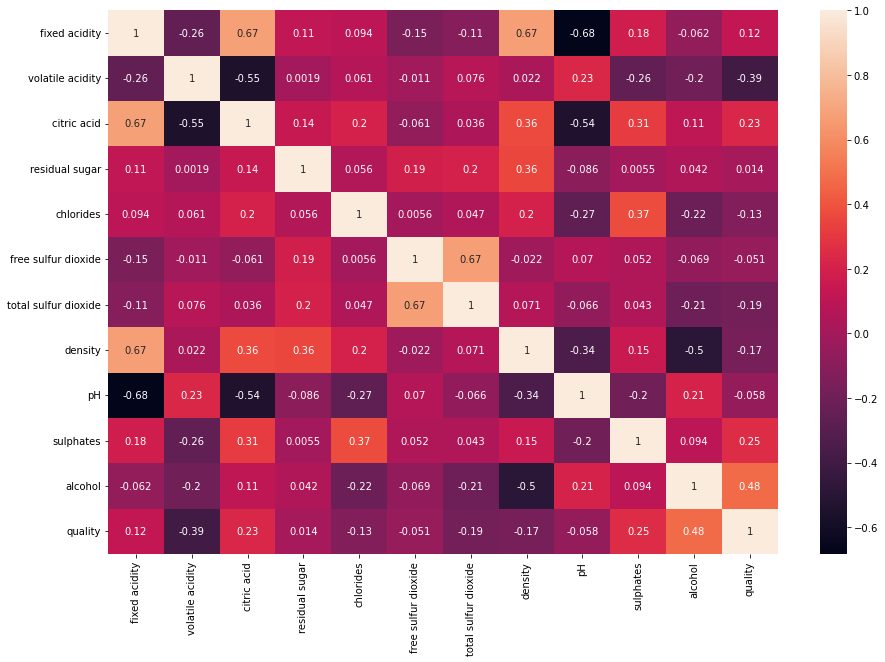

In [17]:
#Plot correlation matrix
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [18]:
#Find fully correlated variables
for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) > 0.67:
            name = df.corr().columns[a]
            print(name)

citric acid
pH


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

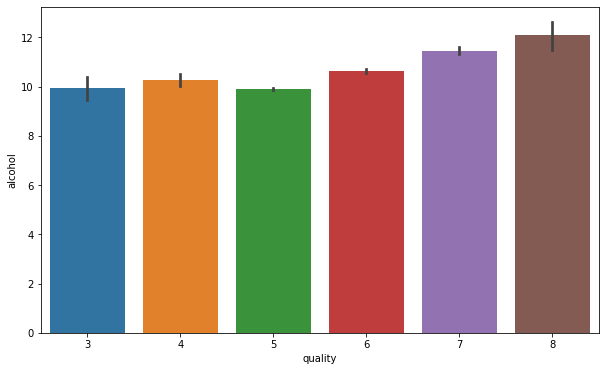

In [19]:
#Bar plot (Quality vs alcohol)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

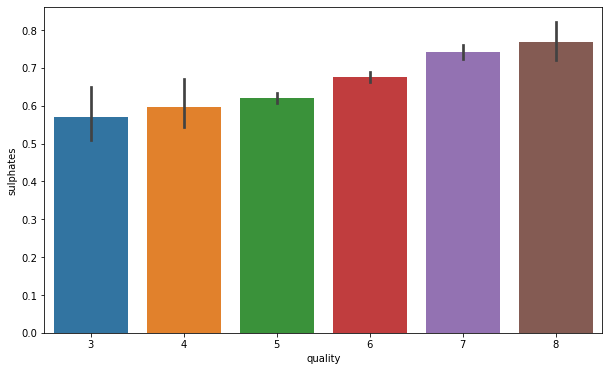

In [20]:
#Bar plot (Quality vs sulphates)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

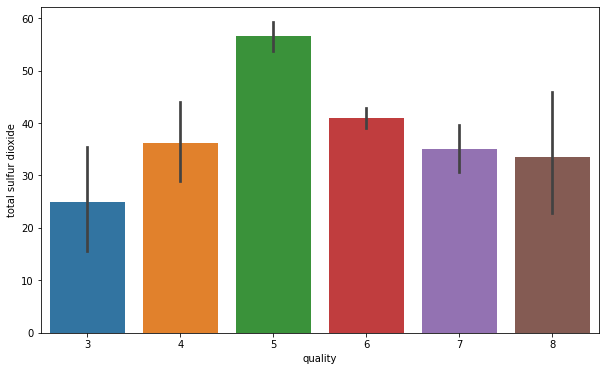

In [21]:
#Bar plot (Quality vs sulphates)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

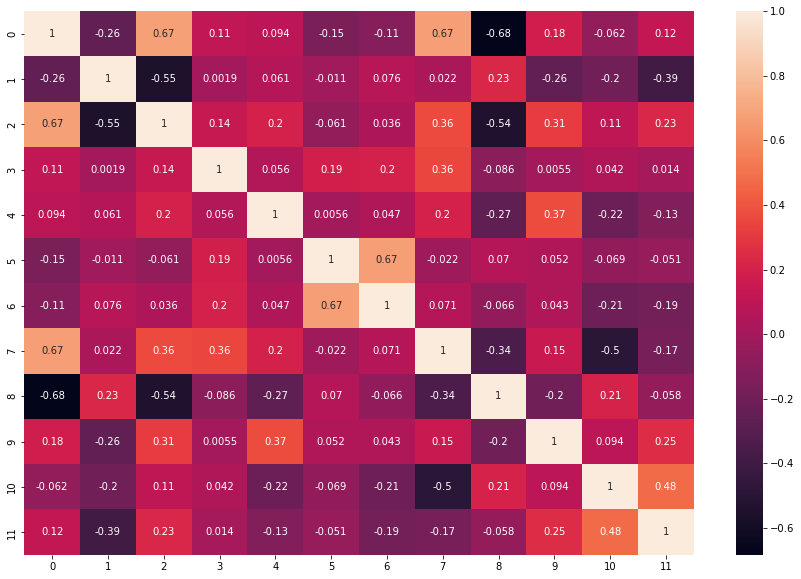

In [22]:
#Normalize
sc = StandardScaler()
norm_df = pd.DataFrame(sc.fit_transform(df))

#Plot normalized correlation matrix
corrMatrix = norm_df.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

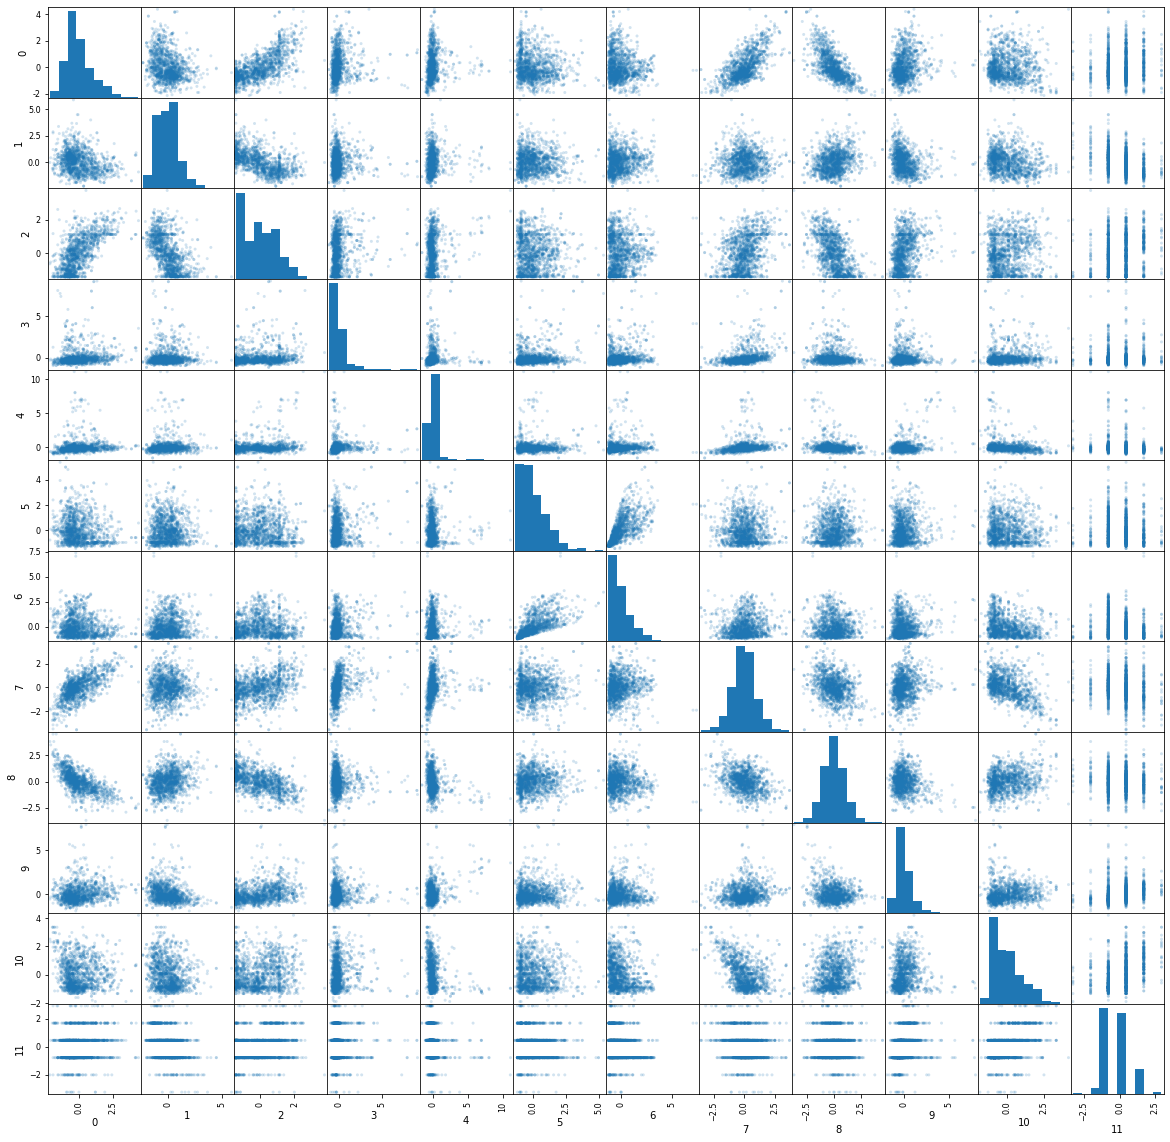

In [23]:
#scatter matrix
pd.plotting.scatter_matrix(norm_df, alpha=0.2, figsize=(20,20), diagonal='hist')
plt.show()

In [24]:
df_new=df.drop('citric acid',axis=1)
df_new.isnull().sum()
df_new.update(df_new.fillna(df_new.mean()))

x = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y = df['quality']

#Split to train & test sets
train, test, train_labels, test_labels = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=42)

#Normalize
sc = StandardScaler()
norm_train_data = pd.DataFrame(sc.fit_transform(train), columns=x.columns)
norm_test_data = pd.DataFrame(sc.fit_transform(test), columns=x.columns)

In [25]:
#Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(train, train_labels)
#prediction
pred = rfc.predict(test)
print("Initial accuracy")
print('Accuracy of training data: ', rfc.score(train, train_labels))
print('Accuracy of testing data: ',rfc.score(test, test_labels))

Initial accuracy
Accuracy of training data:  1.0
Accuracy of testing data:  0.665625


                             0
alcohol               0.146588
sulphates             0.112418
total sulfur dioxide  0.104926
volatile acidity      0.099092
density               0.091783
chlorides             0.082375
fixed acidity         0.075970
pH                    0.074032
citric acid           0.072511
residual sugar        0.070176
free sulfur dioxide   0.070129


<AxesSubplot:>

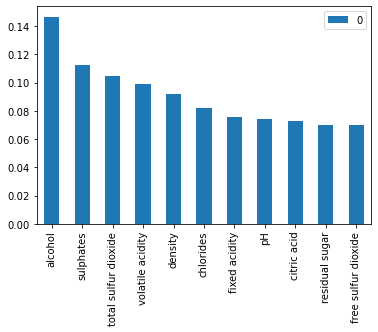

In [26]:
#Evaluate important features
important_features = pd.DataFrame(rfc.feature_importances_, index=train.columns).sort_values(by=0, ascending=False)
print(important_features)
important_features.plot.bar()

In [28]:
#tune rfc parameters for a random grid search
print('Parameters currently in use:\n')
print(rfc.get_params())

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 6]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(train, train_labels)

print(rf_random.best_params_)

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}


In [29]:
print("Accuracy after Randomized Search")
print('New accuracy of training data: ',rf_random.score(train, train_labels))
print('New accuracy of testing data: ',rf_random.score(test, test_labels))

Accuracy after Randomized Search
New accuracy of training data:  0.99687255668491
New accuracy of testing data:  0.65625


In [30]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [30, 40, 50, 60, 70],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [1000, 1200, 1400]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(train, train_labels)

print(grid_search.best_params_)

Fitting 3 folds for each of 135 candidates, totalling 405 fits
{'bootstrap': False, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 1200}


In [31]:
print("Accuracy after Grid Search")
print('Accuracy of training data: ',grid_search.score(train, train_labels))
print('Accuracy of testing data: ',grid_search.score(test, test_labels))

Accuracy after Grid Search
Accuracy of training data:  0.9867083659108679
Accuracy of testing data:  0.646875


# Accuracy decreased after performing grid search, proving that our initial model predicted the quality of wine more accuratly.

In [32]:
#create new data frame with original and predicted values
pred_df = {'Original Values': test_labels, 'Predicted Values':pred}
pd.DataFrame(pred_df).head(50)

,Original Values,Predicted Values
803,6,5
124,5,5
350,6,5
682,5,5
1326,6,6
976,5,5
1493,5,5
706,5,5
613,5,6
1587,6,6


<AxesSubplot:ylabel='Frequency'>

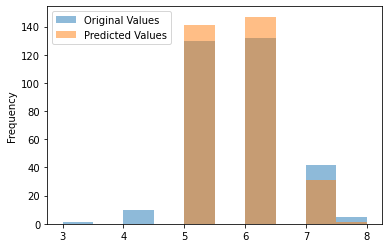

In [33]:
# Plot of original values vs predicted values from initial model.
pred_plot = pd.DataFrame(pred_df)
pred_plot.plot.hist(alpha=0.5)